## Week 5 - Classification Coding Test
---
### [문제 정의]
The competition is simple: use machine learning to create a model that predicts which Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

**The Challenge**  
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

**What Data Will I Use in This Competition?**  
In this competition, you’ll gain access to two similar data sets that include Customer information like Gender, age, Education, etc. One data set is titled madfhantr.csv is a train data set and the other is titled madhante.csv is a test dataset.
madfhantr.csv will contain the details of a subset of the customer loan eligibility process (614 to be exact) and importantly, will reveal whether they are eligible loan yes or not for loan amount so that they can specifically target these customers "Loanstatus" . The madhante.csv data set contains similar information but does not disclose the “Loanstatus” for each customer It’s your job to predict these outcomes.
Using the patterns you find in the madfhantr.csv data, predict whether the other 614 customer on board (found in madhante.csv) loan eligible.

Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kaggle

###  [문제 구성]
1. EDA  
    
2. Data Preprocessing  
    
3. Modeling  

4. Evaluation

5. Visualization

### 0. Import Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### 1. Exploratory Data Analysis (EDA)
    * Data Understanding
    * Information
    * Description
    * Feature Selection

In [2]:
cust_train = pd.read_csv("./Data/madfhantr.csv")
cust_test = pd.read_csv("./Data/madhante.csv")
print('train dataset shape:', cust_train.shape)
print('test dataset shape:', cust_test.shape)
cust_train.head(3)

train dataset shape: (614, 13)
test dataset shape: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
cust_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
cust_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#cust_train.drop('Loan_ID',axis=1,inplace=True)
cust_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Data Preprocessing
    * Missing Value Processing
    * Outlier Processing
    * Feature Engineering

In [6]:
cust_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
print(cust_train['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


In [8]:
print(cust_train['Gender'].value_counts())
print(cust_train['Married'].value_counts())
print(cust_train['Dependents'].value_counts())
print(cust_train['Self_Employed'].value_counts())
print(cust_train['Credit_History'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [9]:
cust_train['Gender'].fillna(cust_train['Gender'].mode()[0],inplace=True)
cust_train['Married'].fillna(cust_train['Married'].mode()[0],inplace=True)
cust_train['Dependents'].fillna(cust_train['Dependents'].mode()[0],inplace=True)
cust_train['Self_Employed'].fillna(cust_train['Self_Employed'].mode()[0],inplace=True)
cust_train['LoanAmount'].fillna(cust_train['LoanAmount'].mean(),inplace=True)
cust_train['Loan_Amount_Term'].fillna(cust_train['Loan_Amount_Term'].mode()[0],inplace=True)
cust_train['Credit_History'].fillna(cust_train['Credit_History'].mode()[0],inplace=True)

print('데이터 세트 Null 값 갯수 ',cust_train.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [10]:
cust_test['Gender'].fillna(cust_train['Gender'].mode()[0],inplace=True)
cust_test['Married'].fillna(cust_train['Married'].mode()[0],inplace=True)
cust_test['Dependents'].fillna(cust_train['Dependents'].mode()[0],inplace=True)
cust_test['Self_Employed'].fillna(cust_train['Self_Employed'].mode()[0],inplace=True)
cust_test['LoanAmount'].fillna(cust_train['LoanAmount'].mean(),inplace=True)
cust_test['Loan_Amount_Term'].fillna(cust_train['Loan_Amount_Term'].mode()[0],inplace=True)
cust_test['Credit_History'].fillna(cust_train['Credit_History'].mode()[0],inplace=True)


In [11]:
def encode_features(dataDF):
    features = ['Gender','Married','Education','Self_Employed','Property_Area']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

train = encode_features(cust_train)
le = preprocessing.LabelEncoder()
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])
test = encode_features(cust_test)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

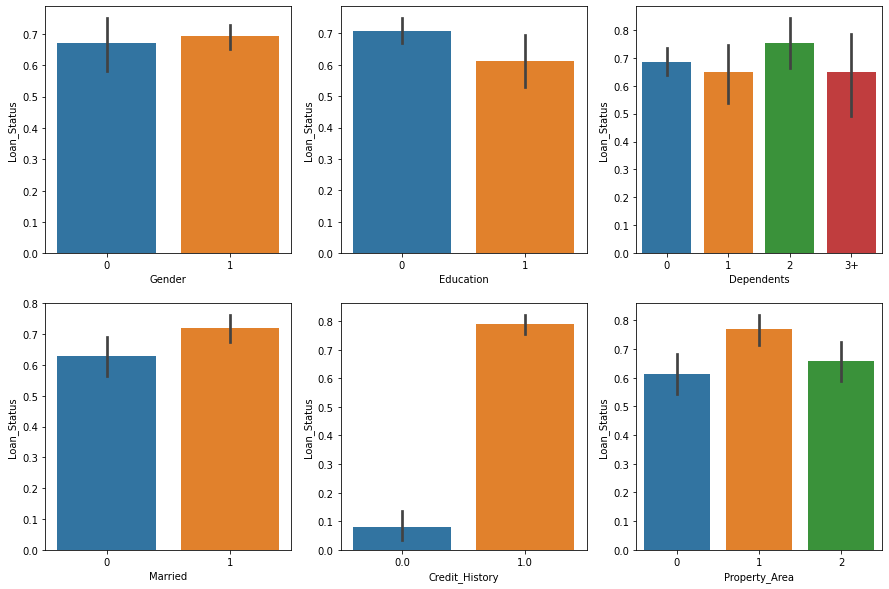

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(231)
sns.barplot(x='Gender', y = 'Loan_Status', data=train)
plt.subplot(232)
sns.barplot(x='Education', y = 'Loan_Status', data=train)
plt.subplot(233)
sns.barplot(x='Dependents', y = 'Loan_Status', data=train)
plt.subplot(234)
sns.barplot(x='Married', y = 'Loan_Status', data=train)
plt.subplot(235)
sns.barplot(x='Credit_History', y = 'Loan_Status', data=train)
plt.subplot(236)
sns.barplot(x='Property_Area', y = 'Loan_Status', data=train)


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

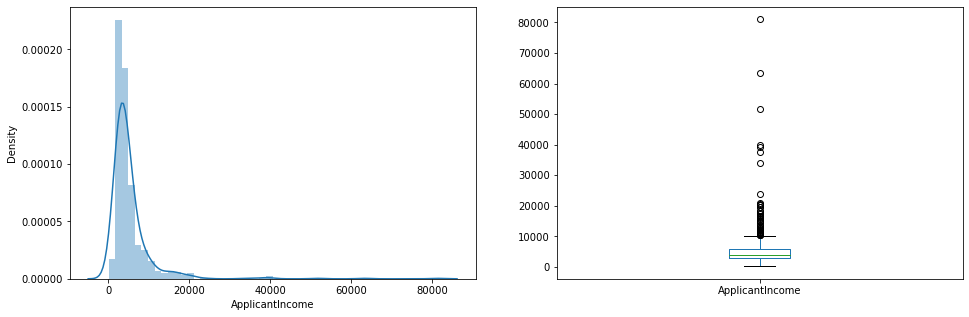

In [13]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Self_Employed'>

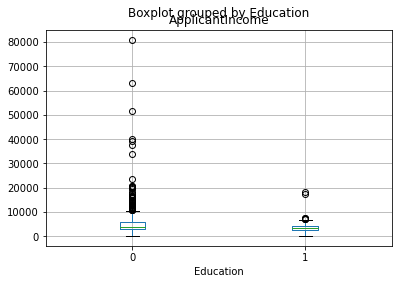

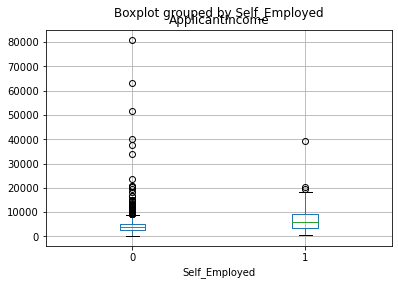

In [14]:
train.boxplot(column='ApplicantIncome', by = 'Education')
train.boxplot(column='ApplicantIncome', by = 'Self_Employed')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

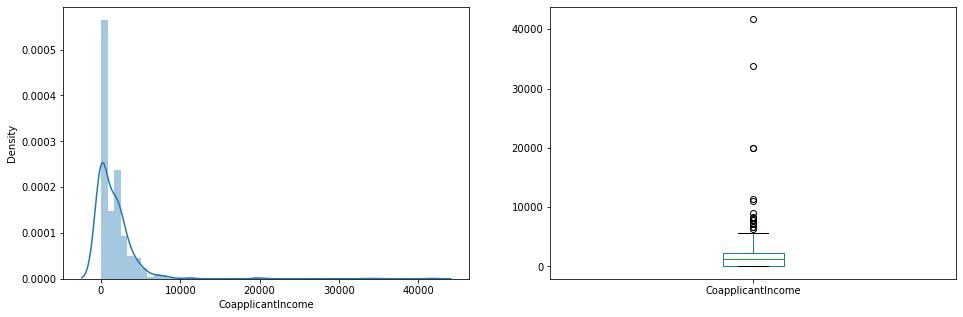

In [15]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

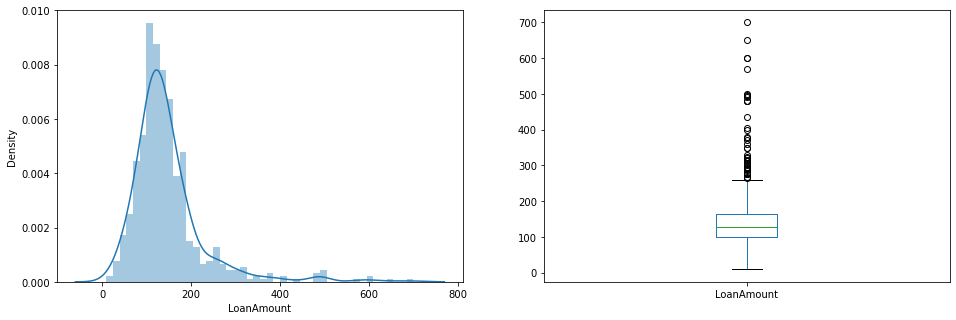

In [16]:
plt.subplot(121)
sns.distplot(train['LoanAmount']); 
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 

In [17]:
train['LoanAmount_log'] = np.log1p(train['LoanAmount']) 
train['ApplicantIncome_log'] = np.log1p(train['ApplicantIncome']) 
train['CoapplicantIncome_log'] = np.log1p(train['CoapplicantIncome'])

train['TotalIncome'] = np.log1p(train['ApplicantIncome']+train['CoapplicantIncome'])
train['TotalIncome_log'] = np.log1p(train['TotalIncome']) 
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
train['Balance_Income']=train['TotalIncome']-(train['EMI']*1000)

train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','TotalIncome'],
           axis=1, inplace=True) 
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log,TotalIncome_log,EMI,Balance_Income
0,LP001002,1,0,0,0,0,1.0,2,1,4.993232,8.674197,0.000000,2.269462,0.406700,-398.026254
1,LP001003,1,1,1,0,0,1.0,0,0,4.859812,8.430327,7.319202,2.273643,0.355556,-346.840824
2,LP001005,1,1,0,0,1,1.0,2,1,4.204693,8.006701,0.000000,2.197969,0.183333,-175.326632
3,LP001006,1,1,0,1,0,1.0,2,1,4.795791,7.857094,7.765993,2.251873,0.333333,-324.827808
4,LP001008,1,0,0,0,0,1.0,2,1,4.955827,8.699681,0.000000,2.272093,0.391667,-382.966985


In [18]:
test['LoanAmount_log'] = np.log1p(test['LoanAmount']) 
test['ApplicantIncome_log'] = np.log1p(test['ApplicantIncome']) 
test['CoapplicantIncome_log'] = np.log1p(test['CoapplicantIncome'])

test['TotalIncome'] = np.log1p(test['ApplicantIncome']+test['CoapplicantIncome'])
test['TotalIncome_log'] = np.log1p(test['TotalIncome']) 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term'] 
test['Balance_Income']=test['TotalIncome']-(test['EMI']*1000)

test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','TotalIncome'],
           axis=1, inplace=True) 

In [19]:
train['Dependents'].replace('0', 0,inplace=True) 
train['Dependents'].replace('1', 1,inplace=True) 
train['Dependents'].replace('2', 2,inplace=True) 
train['Dependents'].replace('3+', 3,inplace=True) 

test['Dependents'].replace('0', 0,inplace=True) 
test['Dependents'].replace('1', 1,inplace=True) 
test['Dependents'].replace('2', 2,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 

### 3. Modeling
    * Selection, Hyper Parameter Control
    * Training / Prediction / Testing  

In [20]:
X_features = train.drop(['Loan_Status','Loan_ID'],axis=1)
y_labels = train['Loan_Status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_labels,
                                                    test_size=0.25, random_state=11)

In [21]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

* Decision Tree Classifier

In [22]:
# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('기본 하이퍼 파라미터: ', dt_clf.get_params())

DecisionTreeClassifier 정확도: 0.7597
기본 하이퍼 파라미터:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 11, 'splitter': 'best'}


In [23]:
params={'max_depth':[4,8,12],
       'min_samples_split':[6,12,16]}
grid_dt = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=3, verbose=1)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_score_)
print(grid_dt.best_params_)

best_df_clf = grid_dt.best_estimator_
pred1 = best_df_clf.predict(X_test)
print("결정트리 예측 정확도: ",accuracy_score(y_test, pred1))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.7956879721585604
{'max_depth': 4, 'min_samples_split': 16}
결정트리 예측 정확도:  0.8181818181818182


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.1s finished


* Random Forest Classifier

In [24]:
# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('기본 하이퍼 파라미터: ', rf_clf.get_params())

RandomForestClassifier 정확도:0.8052
기본 하이퍼 파라미터:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 11, 'verbose': 0, 'warm_start': False}


In [25]:
params = {'n_estimators':[100,200],
         'max_depth':[4,6,8],
         'min_samples_leaf':[6,10,14],
         'min_samples_split':[4,6,8]}
grid_rf = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 100}
0.8065953654188949


In [26]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_leaf=6, 
                                 min_samples_split=4, random_state=0)
rf_clf1.fit(X_train, y_train)
pred1 = rf_clf1.predict(X_test)
print("랜덤포레스트 예측 정확도: ", accuracy_score(y_test, pred1))

랜덤포레스트 예측 정확도:  0.8181818181818182


* Logistic Regression

In [27]:
# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('기본 하이퍼 파라미터: ', lr_clf.get_params())

LogisticRegression 정확도: 0.8182
기본 하이퍼 파라미터:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


* Gradient Boosting Machine

In [28]:
gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
print(accuracy_score(y_test, gbm_pred))

0.8116883116883117


In [29]:
params = {'n_estimators':[100,200],
         'learning_rate':[0.05,0.1,0.2]}

grid_gbm = GridSearchCV(gbm, param_grid=params, cv=3, verbose=1)
grid_gbm.fit(X_train, y_train)
print(grid_gbm.best_params_)
print(grid_gbm.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'learning_rate': 0.05, 'n_estimators': 100}
0.7957162663045017


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.4s finished


In [30]:
gbm_pred1 = grid_gbm.best_estimator_.predict(X_test)
print("GBM 예측 정확도: ", accuracy_score(y_test, gbm_pred1))

GBM 예측 정확도:  0.8116883116883117


* XGBoost

In [31]:
import xgboost as xgb
from xgboost import XGBClassifier


In [32]:
xgb_wrap = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrap.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="error", eval_set=evals,
            verbose=True)
w_preds = xgb_wrap.predict(X_test)
print("XGB 예측 정확도: ",accuracy_score(y_test, w_preds))

[0]	validation_0-error:0.181818
Will train until validation_0-error hasn't improved in 200 rounds.
[1]	validation_0-error:0.181818
[2]	validation_0-error:0.168831
[3]	validation_0-error:0.168831
[4]	validation_0-error:0.168831
[5]	validation_0-error:0.175325
[6]	validation_0-error:0.175325
[7]	validation_0-error:0.181818
[8]	validation_0-error:0.175325
[9]	validation_0-error:0.181818
[10]	validation_0-error:0.181818
[11]	validation_0-error:0.181818
[12]	validation_0-error:0.181818
[13]	validation_0-error:0.181818
[14]	validation_0-error:0.181818
[15]	validation_0-error:0.181818
[16]	validation_0-error:0.181818
[17]	validation_0-error:0.181818
[18]	validation_0-error:0.181818
[19]	validation_0-error:0.181818
[20]	validation_0-error:0.181818
[21]	validation_0-error:0.181818
[22]	validation_0-error:0.181818
[23]	validation_0-error:0.181818
[24]	validation_0-error:0.188312
[25]	validation_0-error:0.188312
[26]	validation_0-error:0.188312
[27]	validation_0-error:0.188312
[28]	validation_0-e

* LightGBM Classifier

In [33]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=100)

params = {'num_leaves': [16, 32],
          'max_depth':[30, 50],
          'min_child_samples':[20, 40],
          'subsample':[0.8, 1]}

# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.807972	valid_0's binary_logloss: 0.573118	valid_1's auc: 0.793003	valid_1's binary_logloss: 0.621577
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.819705	valid_0's binary_logloss: 0.548493	valid_1's auc: 0.812044	valid_1's binary_logloss: 0.588161
[3]	valid_0's auc: 0.830837	valid_0's binary_logloss: 0.527782	valid_1's auc: 0.807762	valid_1's binary_logloss: 0.563656
[4]	valid_0's auc: 0.861088	valid_0's binary_logloss: 0.507898	valid_1's auc: 0.790634	valid_1's binary_logloss: 0.54593
[5]	valid_0's auc: 0.85689	valid_0's binary_logloss: 0.493372	valid_1's auc: 0.79191	valid_1's binary_logloss: 0.530217
[6]	valid_0's auc: 0.864504	valid_0's binary_logloss: 0.480078	valid_1's auc: 0.794825	valid_1's binary_logloss: 0.516478
[7]	valid_0's auc: 0.861735	valid_0's binary_logloss: 0.469667	valid_1's auc: 0.789541	valid_1's binary_logloss: 0.507079
[8]	valid_0's auc: 0.856958	valid_0's binary_logloss: 0.461123	valid_1's auc: 0.783072	v

[37]	valid_0's auc: 0.930635	valid_0's binary_logloss: 0.33848	valid_1's auc: 0.801385	valid_1's binary_logloss: 0.48234
[38]	valid_0's auc: 0.930431	valid_0's binary_logloss: 0.336604	valid_1's auc: 0.804118	valid_1's binary_logloss: 0.480243
[39]	valid_0's auc: 0.930431	valid_0's binary_logloss: 0.334071	valid_1's auc: 0.802114	valid_1's binary_logloss: 0.480893
[40]	valid_0's auc: 0.931702	valid_0's binary_logloss: 0.331094	valid_1's auc: 0.803207	valid_1's binary_logloss: 0.481397
[41]	valid_0's auc: 0.933404	valid_0's binary_logloss: 0.328501	valid_1's auc: 0.804118	valid_1's binary_logloss: 0.481699
[42]	valid_0's auc: 0.934992	valid_0's binary_logloss: 0.324742	valid_1's auc: 0.806122	valid_1's binary_logloss: 0.481638
[43]	valid_0's auc: 0.935083	valid_0's binary_logloss: 0.322821	valid_1's auc: 0.803207	valid_1's binary_logloss: 0.484722
[44]	valid_0's auc: 0.937012	valid_0's binary_logloss: 0.319299	valid_1's auc: 0.80266	valid_1's binary_logloss: 0.486885
[45]	valid_0's auc:

[1]	valid_0's auc: 0.786197	valid_0's binary_logloss: 0.576794	valid_1's auc: 0.795281	valid_1's binary_logloss: 0.62392
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.810208	valid_0's binary_logloss: 0.552431	valid_1's auc: 0.781159	valid_1's binary_logloss: 0.594611
[3]	valid_0's auc: 0.822576	valid_0's binary_logloss: 0.532639	valid_1's auc: 0.780157	valid_1's binary_logloss: 0.573021
[4]	valid_0's auc: 0.833016	valid_0's binary_logloss: 0.516082	valid_1's auc: 0.789176	valid_1's binary_logloss: 0.551936
[5]	valid_0's auc: 0.839291	valid_0's binary_logloss: 0.502036	valid_1's auc: 0.785077	valid_1's binary_logloss: 0.537724
[6]	valid_0's auc: 0.842048	valid_0's binary_logloss: 0.490094	valid_1's auc: 0.774964	valid_1's binary_logloss: 0.527705
[7]	valid_0's auc: 0.835353	valid_0's binary_logloss: 0.480814	valid_1's auc: 0.781341	valid_1's binary_logloss: 0.51585
[8]	valid_0's auc: 0.842048	valid_0's binary_logloss: 0.47046	valid_1's auc: 0.788083	v

[13]	valid_0's auc: 0.879754	valid_0's binary_logloss: 0.423174	valid_1's auc: 0.788265	valid_1's binary_logloss: 0.47885
[14]	valid_0's auc: 0.880424	valid_0's binary_logloss: 0.417553	valid_1's auc: 0.78699	valid_1's binary_logloss: 0.476871
[15]	valid_0's auc: 0.879289	valid_0's binary_logloss: 0.413288	valid_1's auc: 0.78863	valid_1's binary_logloss: 0.474374
[16]	valid_0's auc: 0.879312	valid_0's binary_logloss: 0.408589	valid_1's auc: 0.784894	valid_1's binary_logloss: 0.472138
[17]	valid_0's auc: 0.880015	valid_0's binary_logloss: 0.404531	valid_1's auc: 0.783254	valid_1's binary_logloss: 0.471428
[18]	valid_0's auc: 0.881922	valid_0's binary_logloss: 0.400831	valid_1's auc: 0.777606	valid_1's binary_logloss: 0.473025
[19]	valid_0's auc: 0.88031	valid_0's binary_logloss: 0.398106	valid_1's auc: 0.77797	valid_1's binary_logloss: 0.471995
[20]	valid_0's auc: 0.883692	valid_0's binary_logloss: 0.393098	valid_1's auc: 0.789814	valid_1's binary_logloss: 0.469258
[21]	valid_0's auc: 0

[14]	valid_0's auc: 0.880424	valid_0's binary_logloss: 0.417553	valid_1's auc: 0.78699	valid_1's binary_logloss: 0.476871
[15]	valid_0's auc: 0.879289	valid_0's binary_logloss: 0.413288	valid_1's auc: 0.78863	valid_1's binary_logloss: 0.474374
[16]	valid_0's auc: 0.879312	valid_0's binary_logloss: 0.408589	valid_1's auc: 0.784894	valid_1's binary_logloss: 0.472138
[17]	valid_0's auc: 0.880015	valid_0's binary_logloss: 0.404531	valid_1's auc: 0.783254	valid_1's binary_logloss: 0.471428
[18]	valid_0's auc: 0.881922	valid_0's binary_logloss: 0.400831	valid_1's auc: 0.777606	valid_1's binary_logloss: 0.473025
[19]	valid_0's auc: 0.88031	valid_0's binary_logloss: 0.398106	valid_1's auc: 0.77797	valid_1's binary_logloss: 0.471995
[20]	valid_0's auc: 0.883692	valid_0's binary_logloss: 0.393098	valid_1's auc: 0.789814	valid_1's binary_logloss: 0.469258
[21]	valid_0's auc: 0.885303	valid_0's binary_logloss: 0.39051	valid_1's auc: 0.790361	valid_1's binary_logloss: 0.46947
[22]	valid_0's auc: 0.

[13]	valid_0's auc: 0.836896	valid_0's binary_logloss: 0.459754	valid_1's auc: 0.82234	valid_1's binary_logloss: 0.460794
[14]	valid_0's auc: 0.835421	valid_0's binary_logloss: 0.456255	valid_1's auc: 0.821064	valid_1's binary_logloss: 0.457061
[15]	valid_0's auc: 0.838871	valid_0's binary_logloss: 0.453686	valid_1's auc: 0.823797	valid_1's binary_logloss: 0.456018
[16]	valid_0's auc: 0.841549	valid_0's binary_logloss: 0.451901	valid_1's auc: 0.814869	valid_1's binary_logloss: 0.458876
[17]	valid_0's auc: 0.842502	valid_0's binary_logloss: 0.450009	valid_1's auc: 0.81742	valid_1's binary_logloss: 0.458314
[18]	valid_0's auc: 0.845271	valid_0's binary_logloss: 0.447681	valid_1's auc: 0.815598	valid_1's binary_logloss: 0.459618
[19]	valid_0's auc: 0.848312	valid_0's binary_logloss: 0.445884	valid_1's auc: 0.821155	valid_1's binary_logloss: 0.458883
[20]	valid_0's auc: 0.847653	valid_0's binary_logloss: 0.444306	valid_1's auc: 0.819789	valid_1's binary_logloss: 0.460012
[21]	valid_0's auc

[13]	valid_0's auc: 0.836896	valid_0's binary_logloss: 0.459754	valid_1's auc: 0.82234	valid_1's binary_logloss: 0.460794
[14]	valid_0's auc: 0.835421	valid_0's binary_logloss: 0.456255	valid_1's auc: 0.821064	valid_1's binary_logloss: 0.457061
[15]	valid_0's auc: 0.838871	valid_0's binary_logloss: 0.453686	valid_1's auc: 0.823797	valid_1's binary_logloss: 0.456018
[16]	valid_0's auc: 0.841549	valid_0's binary_logloss: 0.451901	valid_1's auc: 0.814869	valid_1's binary_logloss: 0.458876
[17]	valid_0's auc: 0.842502	valid_0's binary_logloss: 0.450009	valid_1's auc: 0.81742	valid_1's binary_logloss: 0.458314
[18]	valid_0's auc: 0.845271	valid_0's binary_logloss: 0.447681	valid_1's auc: 0.815598	valid_1's binary_logloss: 0.459618
[19]	valid_0's auc: 0.848312	valid_0's binary_logloss: 0.445884	valid_1's auc: 0.821155	valid_1's binary_logloss: 0.458883
[20]	valid_0's auc: 0.847653	valid_0's binary_logloss: 0.444306	valid_1's auc: 0.819789	valid_1's binary_logloss: 0.460012
[21]	valid_0's auc

[5]	valid_0's auc: 0.795275	valid_0's binary_logloss: 0.512272	valid_1's auc: 0.81004	valid_1's binary_logloss: 0.527505
[6]	valid_0's auc: 0.795139	valid_0's binary_logloss: 0.503004	valid_1's auc: 0.8084	valid_1's binary_logloss: 0.515135
[7]	valid_0's auc: 0.806985	valid_0's binary_logloss: 0.494415	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.503231
[8]	valid_0's auc: 0.811161	valid_0's binary_logloss: 0.487017	valid_1's auc: 0.811042	valid_1's binary_logloss: 0.493571
[9]	valid_0's auc: 0.811638	valid_0's binary_logloss: 0.480954	valid_1's auc: 0.812318	valid_1's binary_logloss: 0.485236
[10]	valid_0's auc: 0.821203	valid_0's binary_logloss: 0.474561	valid_1's auc: 0.820335	valid_1's binary_logloss: 0.476348
[11]	valid_0's auc: 0.822349	valid_0's binary_logloss: 0.469385	valid_1's auc: 0.820244	valid_1's binary_logloss: 0.470214
[12]	valid_0's auc: 0.828352	valid_0's binary_logloss: 0.464844	valid_1's auc: 0.821337	valid_1's binary_logloss: 0.464569
[13]	valid_0's auc: 0.83

[15]	valid_0's auc: 0.811876	valid_0's binary_logloss: 0.46155	valid_1's auc: 0.791272	valid_1's binary_logloss: 0.478756
[16]	valid_0's auc: 0.811626	valid_0's binary_logloss: 0.459294	valid_1's auc: 0.793458	valid_1's binary_logloss: 0.475838
[17]	valid_0's auc: 0.812057	valid_0's binary_logloss: 0.456918	valid_1's auc: 0.794552	valid_1's binary_logloss: 0.475445
[18]	valid_0's auc: 0.815847	valid_0's binary_logloss: 0.453893	valid_1's auc: 0.795281	valid_1's binary_logloss: 0.474001
[19]	valid_0's auc: 0.821555	valid_0's binary_logloss: 0.452448	valid_1's auc: 0.795918	valid_1's binary_logloss: 0.473317
[20]	valid_0's auc: 0.820863	valid_0's binary_logloss: 0.451357	valid_1's auc: 0.791181	valid_1's binary_logloss: 0.474595
[21]	valid_0's auc: 0.823076	valid_0's binary_logloss: 0.449444	valid_1's auc: 0.791454	valid_1's binary_logloss: 0.473717
[22]	valid_0's auc: 0.824641	valid_0's binary_logloss: 0.44778	valid_1's auc: 0.794461	valid_1's binary_logloss: 0.473988
[23]	valid_0's auc

[35]	valid_0's auc: 0.851409	valid_0's binary_logloss: 0.426671	valid_1's auc: 0.830904	valid_1's binary_logloss: 0.461656
[36]	valid_0's auc: 0.851228	valid_0's binary_logloss: 0.42652	valid_1's auc: 0.829993	valid_1's binary_logloss: 0.461589
[37]	valid_0's auc: 0.851716	valid_0's binary_logloss: 0.425726	valid_1's auc: 0.827897	valid_1's binary_logloss: 0.463444
[38]	valid_0's auc: 0.851534	valid_0's binary_logloss: 0.423453	valid_1's auc: 0.826257	valid_1's binary_logloss: 0.462301
[39]	valid_0's auc: 0.853236	valid_0's binary_logloss: 0.421989	valid_1's auc: 0.828808	valid_1's binary_logloss: 0.461269
[40]	valid_0's auc: 0.853849	valid_0's binary_logloss: 0.421155	valid_1's auc: 0.831724	valid_1's binary_logloss: 0.459891
[41]	valid_0's auc: 0.85554	valid_0's binary_logloss: 0.419181	valid_1's auc: 0.82981	valid_1's binary_logloss: 0.460593
[42]	valid_0's auc: 0.85554	valid_0's binary_logloss: 0.418164	valid_1's auc: 0.828171	valid_1's binary_logloss: 0.461172
[43]	valid_0's auc: 

[35]	valid_0's auc: 0.855778	valid_0's binary_logloss: 0.42545	valid_1's auc: 0.805394	valid_1's binary_logloss: 0.472236
[36]	valid_0's auc: 0.856028	valid_0's binary_logloss: 0.425106	valid_1's auc: 0.803754	valid_1's binary_logloss: 0.474487
[37]	valid_0's auc: 0.858002	valid_0's binary_logloss: 0.422612	valid_1's auc: 0.804665	valid_1's binary_logloss: 0.471178
[38]	valid_0's auc: 0.862155	valid_0's binary_logloss: 0.419575	valid_1's auc: 0.803207	valid_1's binary_logloss: 0.47006
[39]	valid_0's auc: 0.863891	valid_0's binary_logloss: 0.418019	valid_1's auc: 0.806669	valid_1's binary_logloss: 0.470237
[40]	valid_0's auc: 0.862484	valid_0's binary_logloss: 0.417581	valid_1's auc: 0.806669	valid_1's binary_logloss: 0.470546
[41]	valid_0's auc: 0.865389	valid_0's binary_logloss: 0.416174	valid_1's auc: 0.805394	valid_1's binary_logloss: 0.471878
[42]	valid_0's auc: 0.86877	valid_0's binary_logloss: 0.413091	valid_1's auc: 0.805576	valid_1's binary_logloss: 0.471541
[43]	valid_0's auc:

[17]	valid_0's auc: 0.865287	valid_0's binary_logloss: 0.41762	valid_1's auc: 0.789814	valid_1's binary_logloss: 0.484628
[18]	valid_0's auc: 0.866467	valid_0's binary_logloss: 0.414671	valid_1's auc: 0.787628	valid_1's binary_logloss: 0.484408
[19]	valid_0's auc: 0.866376	valid_0's binary_logloss: 0.412058	valid_1's auc: 0.789267	valid_1's binary_logloss: 0.484127
[20]	valid_0's auc: 0.87079	valid_0's binary_logloss: 0.406216	valid_1's auc: 0.793823	valid_1's binary_logloss: 0.478859
[21]	valid_0's auc: 0.874058	valid_0's binary_logloss: 0.402505	valid_1's auc: 0.794643	valid_1's binary_logloss: 0.480825
[22]	valid_0's auc: 0.874626	valid_0's binary_logloss: 0.400128	valid_1's auc: 0.797558	valid_1's binary_logloss: 0.478736
[23]	valid_0's auc: 0.876645	valid_0's binary_logloss: 0.395857	valid_1's auc: 0.802478	valid_1's binary_logloss: 0.474639
[24]	valid_0's auc: 0.879164	valid_0's binary_logloss: 0.391563	valid_1's auc: 0.802934	valid_1's binary_logloss: 0.476455
[25]	valid_0's auc

[1]	valid_0's auc: 0.796421	valid_0's binary_logloss: 0.577604	valid_1's auc: 0.792183	valid_1's binary_logloss: 0.625686
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839166	valid_0's binary_logloss: 0.552338	valid_1's auc: 0.79191	valid_1's binary_logloss: 0.597974
[3]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.533515	valid_1's auc: 0.800565	valid_1's binary_logloss: 0.573859
[4]	valid_0's auc: 0.844272	valid_0's binary_logloss: 0.516307	valid_1's auc: 0.796283	valid_1's binary_logloss: 0.557629
[5]	valid_0's auc: 0.858002	valid_0's binary_logloss: 0.501128	valid_1's auc: 0.797558	valid_1's binary_logloss: 0.541601
[6]	valid_0's auc: 0.871823	valid_0's binary_logloss: 0.488271	valid_1's auc: 0.80266	valid_1's binary_logloss: 0.528053
[7]	valid_0's auc: 0.873911	valid_0's binary_logloss: 0.476688	valid_1's auc: 0.803025	valid_1's binary_logloss: 0.517119
[8]	valid_0's auc: 0.882455	valid_0's binary_logloss: 0.466184	valid_1's auc: 0.805211	

[1]	valid_0's auc: 0.807972	valid_0's binary_logloss: 0.573118	valid_1's auc: 0.793003	valid_1's binary_logloss: 0.621577
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.819705	valid_0's binary_logloss: 0.548493	valid_1's auc: 0.812044	valid_1's binary_logloss: 0.588161
[3]	valid_0's auc: 0.830837	valid_0's binary_logloss: 0.527782	valid_1's auc: 0.807762	valid_1's binary_logloss: 0.563656
[4]	valid_0's auc: 0.861088	valid_0's binary_logloss: 0.507898	valid_1's auc: 0.790634	valid_1's binary_logloss: 0.54593
[5]	valid_0's auc: 0.85689	valid_0's binary_logloss: 0.493372	valid_1's auc: 0.79191	valid_1's binary_logloss: 0.530217
[6]	valid_0's auc: 0.864504	valid_0's binary_logloss: 0.480078	valid_1's auc: 0.794825	valid_1's binary_logloss: 0.516478
[7]	valid_0's auc: 0.861735	valid_0's binary_logloss: 0.469667	valid_1's auc: 0.789541	valid_1's binary_logloss: 0.507079
[8]	valid_0's auc: 0.856958	valid_0's binary_logloss: 0.461123	valid_1's auc: 0.783072	v

[25]	valid_0's auc: 0.91467	valid_0's binary_logloss: 0.376304	valid_1's auc: 0.814504	valid_1's binary_logloss: 0.459861
[26]	valid_0's auc: 0.917359	valid_0's binary_logloss: 0.372597	valid_1's auc: 0.810678	valid_1's binary_logloss: 0.463808
[27]	valid_0's auc: 0.920105	valid_0's binary_logloss: 0.368955	valid_1's auc: 0.809402	valid_1's binary_logloss: 0.464462
[28]	valid_0's auc: 0.920559	valid_0's binary_logloss: 0.365476	valid_1's auc: 0.813047	valid_1's binary_logloss: 0.461209
[29]	valid_0's auc: 0.92183	valid_0's binary_logloss: 0.362377	valid_1's auc: 0.811407	valid_1's binary_logloss: 0.464648
[30]	valid_0's auc: 0.92242	valid_0's binary_logloss: 0.358768	valid_1's auc: 0.807034	valid_1's binary_logloss: 0.472204
[31]	valid_0's auc: 0.922896	valid_0's binary_logloss: 0.356757	valid_1's auc: 0.807762	valid_1's binary_logloss: 0.472688
[32]	valid_0's auc: 0.925302	valid_0's binary_logloss: 0.352362	valid_1's auc: 0.805394	valid_1's binary_logloss: 0.472116
[33]	valid_0's auc:

[1]	valid_0's auc: 0.768076	valid_0's binary_logloss: 0.577281	valid_1's auc: 0.791819	valid_1's binary_logloss: 0.621932
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.768995	valid_0's binary_logloss: 0.555402	valid_1's auc: 0.800474	valid_1's binary_logloss: 0.589296
[3]	valid_0's auc: 0.794458	valid_0's binary_logloss: 0.537948	valid_1's auc: 0.803663	valid_1's binary_logloss: 0.564018
[4]	valid_0's auc: 0.794594	valid_0's binary_logloss: 0.524066	valid_1's auc: 0.804574	valid_1's binary_logloss: 0.543986
[5]	valid_0's auc: 0.795275	valid_0's binary_logloss: 0.512272	valid_1's auc: 0.81004	valid_1's binary_logloss: 0.527505
[6]	valid_0's auc: 0.795139	valid_0's binary_logloss: 0.503004	valid_1's auc: 0.8084	valid_1's binary_logloss: 0.515135
[7]	valid_0's auc: 0.806985	valid_0's binary_logloss: 0.494415	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.503231
[8]	valid_0's auc: 0.811161	valid_0's binary_logloss: 0.487017	valid_1's auc: 0.811042	v

[1]	valid_0's auc: 0.765307	valid_0's binary_logloss: 0.579311	valid_1's auc: 0.766582	valid_1's binary_logloss: 0.626288
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.769347	valid_0's binary_logloss: 0.558313	valid_1's auc: 0.77305	valid_1's binary_logloss: 0.595789
[3]	valid_0's auc: 0.782407	valid_0's binary_logloss: 0.542108	valid_1's auc: 0.786716	valid_1's binary_logloss: 0.571921
[4]	valid_0's auc: 0.781295	valid_0's binary_logloss: 0.5283	valid_1's auc: 0.772504	valid_1's binary_logloss: 0.555822
[5]	valid_0's auc: 0.78091	valid_0's binary_logloss: 0.517407	valid_1's auc: 0.772321	valid_1's binary_logloss: 0.5414
[6]	valid_0's auc: 0.784813	valid_0's binary_logloss: 0.508325	valid_1's auc: 0.77961	valid_1's binary_logloss: 0.528691
[7]	valid_0's auc: 0.785607	valid_0's binary_logloss: 0.50025	valid_1's auc: 0.773233	valid_1's binary_logloss: 0.521222
[8]	valid_0's auc: 0.786776	valid_0's binary_logloss: 0.493289	valid_1's auc: 0.770681	valid_

[6]	valid_0's auc: 0.795139	valid_0's binary_logloss: 0.503004	valid_1's auc: 0.8084	valid_1's binary_logloss: 0.515135
[7]	valid_0's auc: 0.806985	valid_0's binary_logloss: 0.494415	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.503231
[8]	valid_0's auc: 0.811161	valid_0's binary_logloss: 0.487017	valid_1's auc: 0.811042	valid_1's binary_logloss: 0.493571
[9]	valid_0's auc: 0.811638	valid_0's binary_logloss: 0.480954	valid_1's auc: 0.812318	valid_1's binary_logloss: 0.485236
[10]	valid_0's auc: 0.821203	valid_0's binary_logloss: 0.474561	valid_1's auc: 0.820335	valid_1's binary_logloss: 0.476348
[11]	valid_0's auc: 0.822349	valid_0's binary_logloss: 0.469385	valid_1's auc: 0.820244	valid_1's binary_logloss: 0.470214
[12]	valid_0's auc: 0.828352	valid_0's binary_logloss: 0.464844	valid_1's auc: 0.821337	valid_1's binary_logloss: 0.464569
[13]	valid_0's auc: 0.836896	valid_0's binary_logloss: 0.459754	valid_1's auc: 0.82234	valid_1's binary_logloss: 0.460794
[14]	valid_0's auc: 0.8

[2]	valid_0's auc: 0.643121	valid_0's binary_logloss: 0.59927	valid_1's auc: 0.562682	valid_1's binary_logloss: 0.661851
[3]	valid_0's auc: 0.637924	valid_0's binary_logloss: 0.596321	valid_1's auc: 0.546647	valid_1's binary_logloss: 0.662665
[4]	valid_0's auc: 0.648398	valid_0's binary_logloss: 0.593566	valid_1's auc: 0.559767	valid_1's binary_logloss: 0.66171
[5]	valid_0's auc: 0.653266	valid_0's binary_logloss: 0.590304	valid_1's auc: 0.553663	valid_1's binary_logloss: 0.662162
[6]	valid_0's auc: 0.651893	valid_0's binary_logloss: 0.587619	valid_1's auc: 0.546101	valid_1's binary_logloss: 0.663623
[7]	valid_0's auc: 0.659938	valid_0's binary_logloss: 0.585398	valid_1's auc: 0.549745	valid_1's binary_logloss: 0.663004
[8]	valid_0's auc: 0.665827	valid_0's binary_logloss: 0.582427	valid_1's auc: 0.540816	valid_1's binary_logloss: 0.664471
[9]	valid_0's auc: 0.676652	valid_0's binary_logloss: 0.578712	valid_1's auc: 0.538356	valid_1's binary_logloss: 0.666385
[10]	valid_0's auc: 0.6789

[51]	valid_0's auc: 0.871199	valid_0's binary_logloss: 0.404942	valid_1's auc: 0.806305	valid_1's binary_logloss: 0.473068
[52]	valid_0's auc: 0.871131	valid_0's binary_logloss: 0.404449	valid_1's auc: 0.806305	valid_1's binary_logloss: 0.474088
[53]	valid_0's auc: 0.871925	valid_0's binary_logloss: 0.402481	valid_1's auc: 0.804847	valid_1's binary_logloss: 0.474781
[54]	valid_0's auc: 0.872265	valid_0's binary_logloss: 0.401931	valid_1's auc: 0.802843	valid_1's binary_logloss: 0.476338
[55]	valid_0's auc: 0.872175	valid_0's binary_logloss: 0.401292	valid_1's auc: 0.803207	valid_1's binary_logloss: 0.477198
[56]	valid_0's auc: 0.873332	valid_0's binary_logloss: 0.399512	valid_1's auc: 0.805029	valid_1's binary_logloss: 0.477474
[57]	valid_0's auc: 0.873604	valid_0's binary_logloss: 0.397995	valid_1's auc: 0.803754	valid_1's binary_logloss: 0.477975
[58]	valid_0's auc: 0.873559	valid_0's binary_logloss: 0.397646	valid_1's auc: 0.804118	valid_1's binary_logloss: 0.478263
[59]	valid_0's a

In [34]:
lgbm_pred = gridcv.predict(X_test)
print("LightGBM 예측 정확도: ",accuracy_score(y_test, lgbm_pred))

LightGBM 예측 정확도:  0.8246753246753247


## 4. Evaluation
    * Accuracy / Recall / Precision / F1 Score

In [35]:
print("XGB Accuracy: ",accuracy_score(y_test, w_preds))
print("XGB Recall: ",recall_score(y_test, w_preds))
print("XGB Precision: ",precision_score(y_test, w_preds))
print("XGB F1 Score: ",f1_score(y_test, w_preds))

print("LGBM Accuracy: ",accuracy_score(y_test, lgbm_pred))
print("LGBM Recall: ",recall_score(y_test, lgbm_pred))
print("LGBM Precision: ",precision_score(y_test, lgbm_pred))
print("LGBM F1 Score: ",f1_score(y_test, lgbm_pred))


XGB Accuracy:  0.8311688311688312
XGB Recall:  0.9795918367346939
XGB Precision:  0.8
XGB F1 Score:  0.8807339449541285
LGBM Accuracy:  0.8246753246753247
LGBM Recall:  0.9591836734693877
LGBM Precision:  0.8034188034188035
LGBM F1 Score:  0.8744186046511628


## 5. Visualization

[1]	training's auc: 0.855483	training's binary_logloss: 0.571302	valid_1's auc: 0.790725	valid_1's binary_logloss: 0.624358
Training until validation scores don't improve for 30 rounds
[2]	training's auc: 0.881831	training's binary_logloss: 0.54283	valid_1's auc: 0.813776	valid_1's binary_logloss: 0.591487
[3]	training's auc: 0.901042	training's binary_logloss: 0.519831	valid_1's auc: 0.812318	valid_1's binary_logloss: 0.566098
[4]	training's auc: 0.911277	training's binary_logloss: 0.499905	valid_1's auc: 0.809311	valid_1's binary_logloss: 0.548097
[5]	training's auc: 0.916167	training's binary_logloss: 0.483156	valid_1's auc: 0.81168	valid_1's binary_logloss: 0.53176
[6]	training's auc: 0.923634	training's binary_logloss: 0.466091	valid_1's auc: 0.818786	valid_1's binary_logloss: 0.516708
[7]	training's auc: 0.9263	training's binary_logloss: 0.453167	valid_1's auc: 0.82562	valid_1's binary_logloss: 0.503356
[8]	training's auc: 0.930113	training's binary_logloss: 0.439582	valid_1's au

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

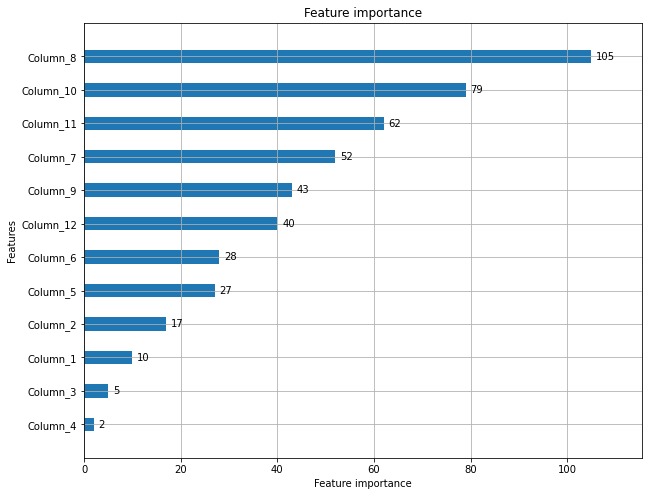

In [36]:
from lightgbm import plot_importance

lgbm_clf.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(lgbm_clf, ax=ax , max_num_features=20,height=0.4)

* Submit

In [37]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log,TotalIncome_log,EMI,Balance_Income
0,LP001015,1,1,0,0,0,1.0,2,4.709530,8.651899,0.000000,2.267155,0.305556,-296.903657
1,LP001022,1,1,1,0,0,1.0,2,4.844187,8.031710,7.313887,2.243769,0.350000,-341.571201
2,LP001031,1,1,2,0,0,1.0,2,5.342334,8.517393,7.496097,2.284912,0.577778,-568.952953
3,LP001035,1,1,2,0,0,1.0,2,4.615121,7.758333,7.842671,2.250695,0.277778,-269.283444
4,LP001051,1,0,0,1,0,1.0,2,4.369448,8.094684,0.000000,2.207690,0.216667,-208.571983


In [38]:
test1 = test.drop('Loan_ID', axis=1)
test_scaled = scaler.fit_transform(test1)
prediction = xgb_wrap.predict(test_scaled)

submission = pd.DataFrame({ 'Loan_ID': test['Loan_ID'],
                            'Loan_Status': prediction })

print(submission.shape)

(367, 2)


In [39]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
submission.to_csv("submission_xgb.csv", index=False)